In [1]:
# race, sex, native.country제거
# 결측치 처리
# 이상치 처리
# 오버 샘플링을 일부만
# onehot 다 제거
# numerical feature / categorical feature 따로 관리
# light gbm만 사용
# confusion matrix
# feature importance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('dataset/train.csv', index_col=0)
test = pd.read_csv('dataset/test.csv', index_col=0)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
id,,,,,,,,,,,,,,,
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


# 변수를 타입별로 분류

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education.num   17480 non-null  int64 
 5   marital.status  17480 non-null  object
 6   occupation      15637 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital.gain    17480 non-null  int64 
 11  capital.loss    17480 non-null  int64 
 12  hours.per.week  17480 non-null  int64 
 13  native.country  16897 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


In [5]:
drop_features = ['race', 'sex', 'native.country']
categorical_features = [col for col in data.columns if data[col].dtype == 'object' and col not in drop_features]
numerical_features = [col for col in data.columns if data[col].dtype == 'int64' and col not in drop_features]

# 결측값 처리

In [6]:
data.drop(drop_features, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

In [7]:
def findMissIndex(df, mis_var_feature):
    index = data[data[mis_var_feature].isnull()].index
    return index
mis_occ_indices = findMissIndex(data, 'occupation')
data.drop(mis_occ_indices, axis=0, inplace=True)

In [8]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
target            0
dtype: int64


# 수치형 데이터 확인

In [9]:
numerical_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'target']

## age

age
SKEW: 0.5348430104734611
KURT: -0.13923606669507294


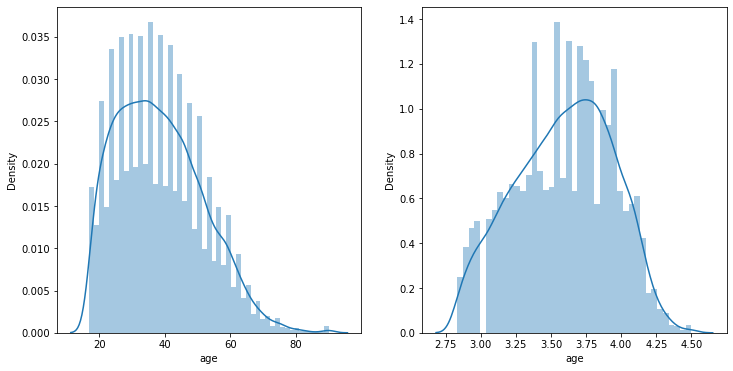

In [10]:
var = numerical_features[0]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]), ax=ax[1])
data[f'log_{var}']=np.log(data[var])
test[f'log_{var}']=np.log(test[var])

## fnlwgt

fnlwgt
SKEW: 1.4168041613653444
KURT: 6.229880450491939


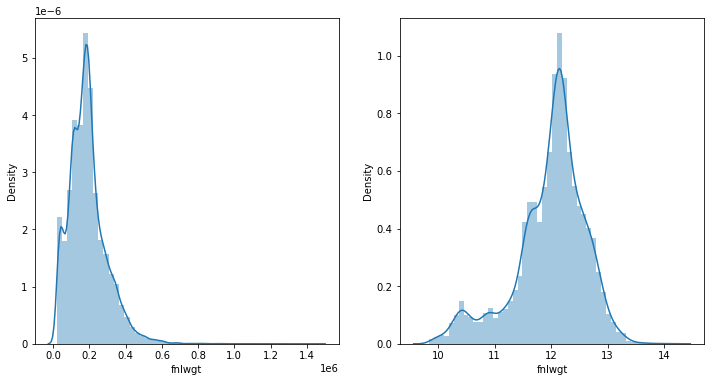

In [11]:
var = numerical_features[1]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]), ax=ax[1])
data[f'log_{var}']=np.log(data[var])
test[f'log_{var}']=np.log(test[var])

## education.num

education.num


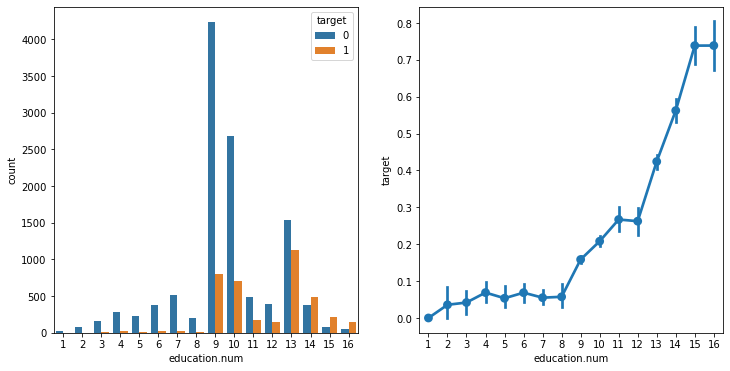

In [12]:
var = numerical_features[2]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=var, hue='target', data=data, ax=ax[0])
sns.pointplot(y='target', x=var, data=data, ax=ax[1])
plt.show()


In [13]:
data['edu'] = 0
index = data[(data['education.num']==9) | (data['education.num']==10)].index
data.loc[index, 'edu'] = 1
index = data[(data['education.num']==11) | (data['education.num']==12)].index
data.loc[index, 'edu'] = 2
index = data[(data['education.num']>=13)].index
data.loc[index, 'edu'] = 3

test['edu'] = 0
index = test[(test['education.num']==9) | (test['education.num']==10)].index
test.loc[index, 'edu'] = 1
index = test[(test['education.num']==11) | (test['education.num']==12)].index
test.loc[index, 'edu'] = 2
index = test[(test['education.num']>=13)].index
test.loc[index, 'edu'] = 3

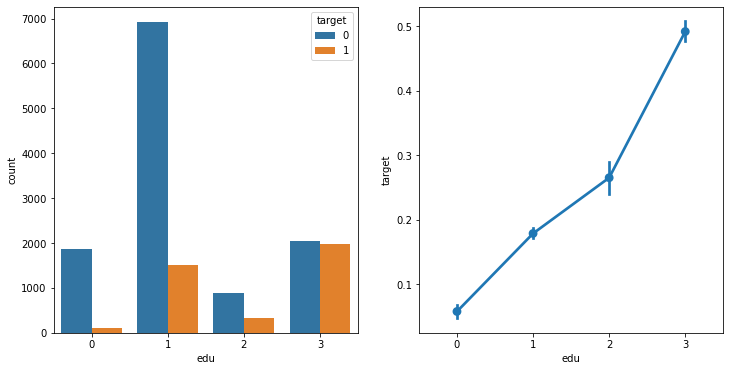

In [14]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='edu', hue='target', data=data, ax=ax[0])
sns.pointplot(y='target', x='edu', data=data, ax=ax[1])
plt.show()

## capital.gain

capital.gain
SKEW: 11.585543862862904
KURT: 144.55567256393434


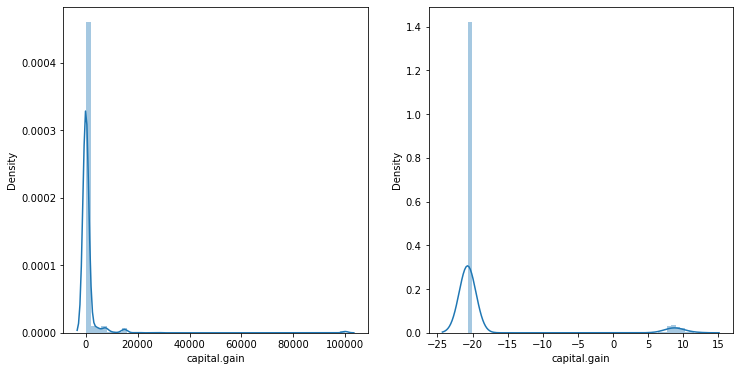

In [15]:
var = numerical_features[3]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log(data[var]+1e-9)
test[f'log_{var}']=np.log(test[var]+1e-9)

## capital.loss

capital.loss
SKEW: 4.579334775373474
KURT: 20.048770717083567


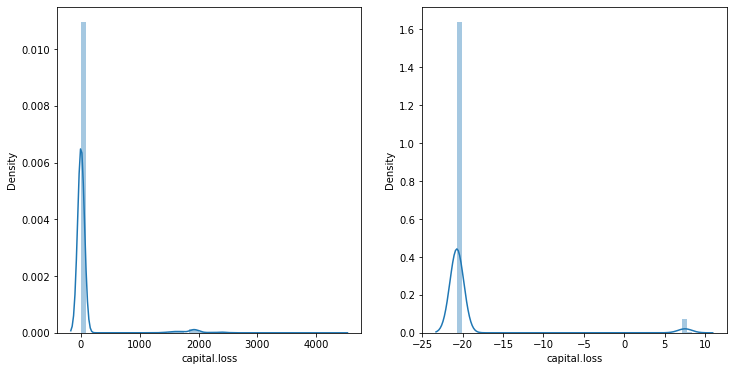

In [16]:
var = numerical_features[4]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log(data[var]+1e-9)
test[f'log_{var}']=np.log(test[var]+1e-9)

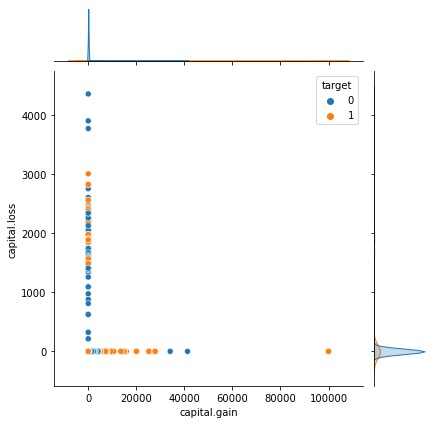

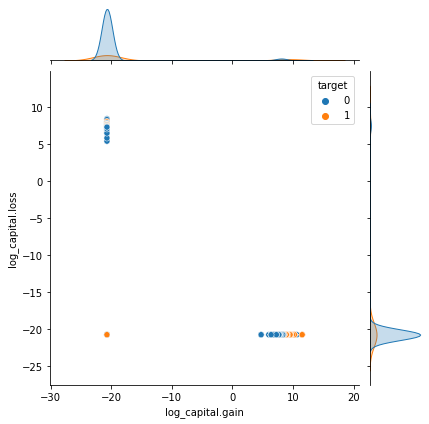

In [17]:
sns.jointplot(x="capital.gain", y="capital.loss", hue='target',data=data)
sns.jointplot(x="log_capital.gain", y="log_capital.loss", hue='target',data=data)
plt.show()

## hours.per.week

hours.per.week
MEAN: 40.95670525036772
STD: 12.027718289682902
MEAN: 3.6565745735064406
STD: 0.3776116675817563


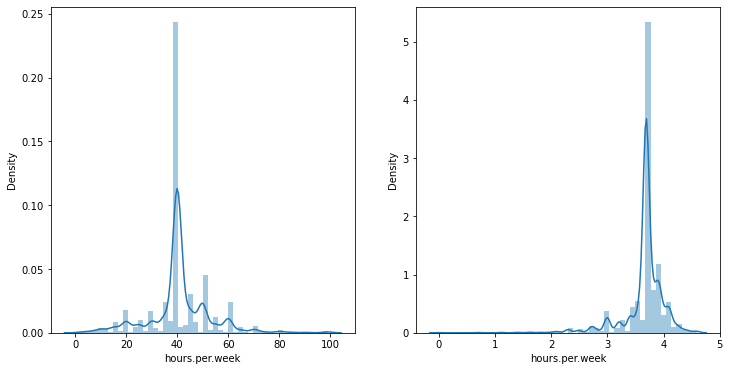

In [18]:
var = numerical_features[5]
print(var)
print('MEAN:',data[var].mean())
print('STD:',data[var].std())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log(data[var]+1e-9)
test[f'log_{var}']=np.log(test[var]+1e-9)
print('MEAN:',data[f'log_{var}'].mean())
print('STD:',data[f'log_{var}'].std())

# Categorical Features

In [19]:
categorical_features

['workclass', 'education', 'marital.status', 'occupation', 'relationship']

## workclass

workclass


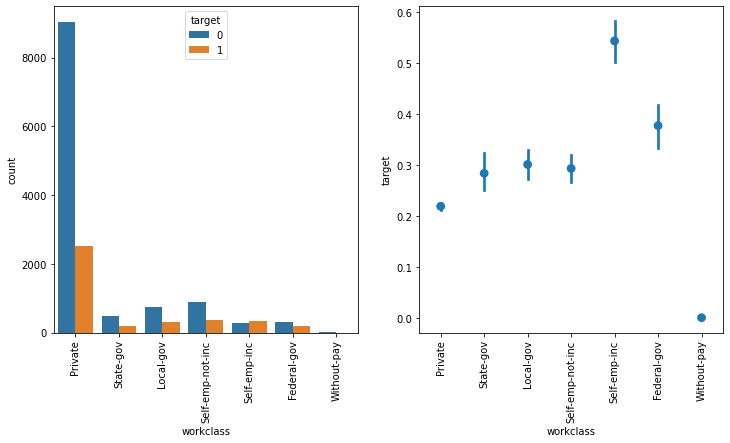

In [20]:
var = categorical_features[0]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [21]:
def workclass(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Private') |(data[var]=='State-gov') | (data[var]=='Local-gov') | data[var]=='Self-emp-not-inc'].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Self-emp-inc') | (data[var]=='Federal-gov') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = workclass(data, var)
test = workclass(test, var)
categorical_features.append(f'new_{var}')

## education

education


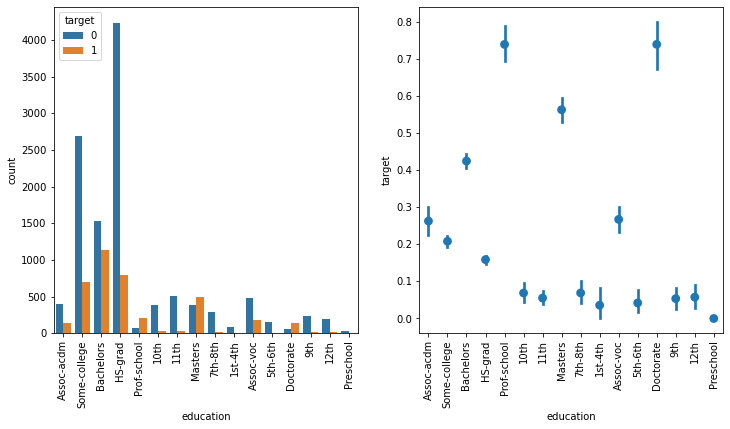

In [22]:
var = categorical_features[1]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [23]:
def education(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Assoc-acdm') | (data[var]=='Some-college') 
                 | (data[var]=='HS-grad') | (data[var]=='Assoc-voc')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Bachelors') | (data[var]=='Masters')].index
    data.loc[index, f'new_{var}'] = 'level2'

    index = data[(data[var]=='Prof-school') | (data[var]=='Doctorate') ].index
    data.loc[index, f'new_{var}'] = 'level3'
    
    return data

data = education(data, var)
test = education(test, var)
categorical_features.append(f'new_{var}')

## marital.status

marital.status


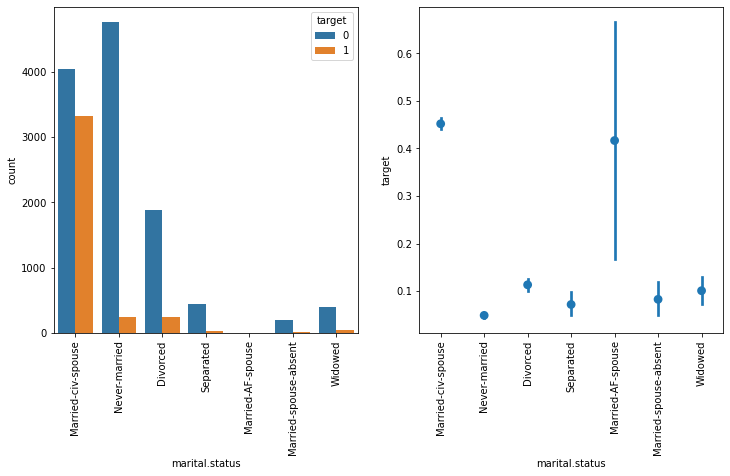

In [24]:
var = categorical_features[2]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [25]:
def Marry(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Never-married') | (data[var]=='Divorced')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Married-civ-spouse') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = Marry(data, var)
test = Marry(test, var)
categorical_features.append(f'new_{var}')

## occupation

occupation


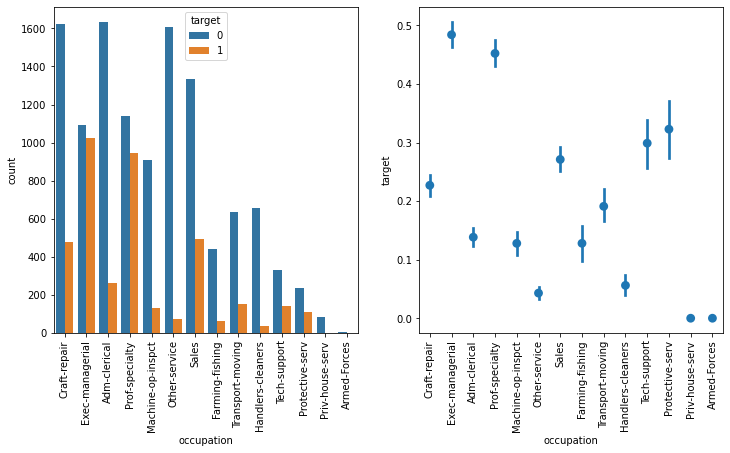

In [26]:
var = categorical_features[3]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1],join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [27]:
data[var].unique()

array(['Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Prof-specialty', 'Machine-op-inspct', 'Other-service', 'Sales',
       'Farming-fishing', 'Transport-moving', 'Handlers-cleaners',
       'Tech-support', 'Protective-serv', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [28]:
def Occupation(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Adm-clerical') | (data[var]=='Machine-op-inspct') 
                 | (data[var]=='Farming-fishing') | (data[var]=='Transport-moving')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Craft-repair') | (data[var]=='Sales') 
                 | (data[var]=='Protective-serv') | (data[var]=='Tech-support')].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    index = data[(data[var]=='Exec-managerial') | (data[var]=='Prof-specialty') ].index
    data.loc[index, f'new_{var}'] = 'level3'
    
    return data

data = Occupation(data, var)
test = Occupation(test, var)
categorical_features.append(f'new_{var}')

## relationship

relationship


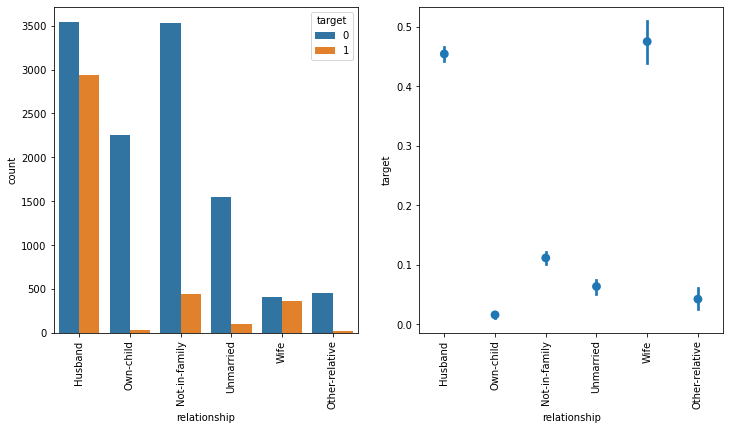

In [29]:
var = categorical_features[4]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1],join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [30]:
def Relationship(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Not-in-family') | (data[var]=='Unmarried') 
                 | (data[var]=='Other-relative')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Husband') | (data[var]=='Wife') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = Relationship(data, var)
test = Relationship(test, var)
categorical_features.append(f'new_{var}')

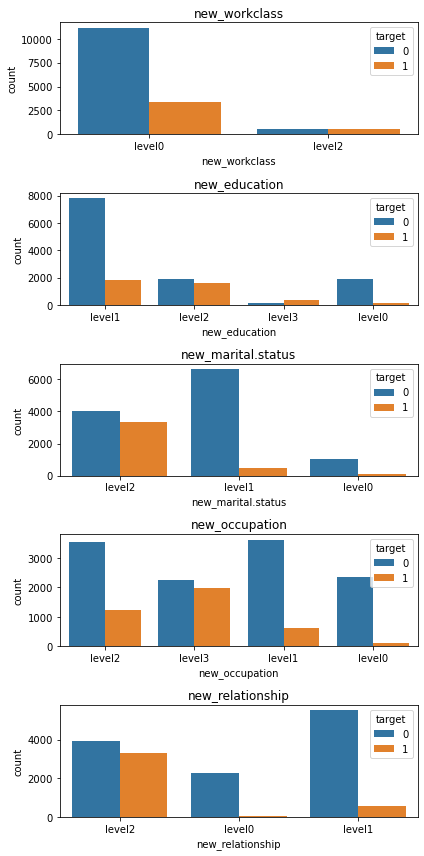

In [31]:
new_features = [ col for col in categorical_features if 'new' in col]
f, ax = plt.subplots(5,1, figsize=(6,12))
for i, var in enumerate(new_features):
    ax[i].set(title=var)
    sns.countplot(x=var,hue='target',data=data, ax=ax[i])
    
plt.tight_layout()
plt.show()

In [32]:
data[categorical_features]=data[categorical_features].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15637 entries, 0 to 17473
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15637 non-null  int64  
 1   workclass           15637 non-null  object 
 2   fnlwgt              15637 non-null  int64  
 3   education           15637 non-null  object 
 4   education.num       15637 non-null  int64  
 5   marital.status      15637 non-null  object 
 6   occupation          15637 non-null  object 
 7   relationship        15637 non-null  object 
 8   capital.gain        15637 non-null  int64  
 9   capital.loss        15637 non-null  int64  
 10  hours.per.week      15637 non-null  int64  
 11  target              15637 non-null  int64  
 12  log_age             15637 non-null  float64
 13  log_fnlwgt          15637 non-null  float64
 14  edu                 15637 non-null  int64  
 15  log_capital.gain    15637 non-null  float64
 16  log_

# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

for var in categorical_features:
    le = LabelEncoder()
    le.fit(data[var])
    data[var] = le.transform(data[var])
    test[var] = le.transform(test[var])

# Modeling(LGBM)

In [34]:
up_sample=False
data.shape

(15637, 23)

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score

# up sample
if up_sample:
    import random
    target_1_Index = list(data[data['target']==1].index)
    target_1_Index = random.sample(target_1_Index, 3915//10)
    target_1_Index_samples = data.loc[target_1_Index]
    data = data.append(target_1_Index_samples)
    del target_1_Index_samples, target_1_Index


# model
model = LGBMClassifier(random_state=123)

label = 'target'
y_train = data[label]
X_train = data.drop(label, axis=1)

print(X_train.shape, y_train.shape)


kfold = KFold(n_splits=5, shuffle=True)

print(f'### 5 fold CV of LGBM ###')
cv_result = cross_val_score(model, X_train, y_train, 
                            cv=kfold, scoring='accuracy', n_jobs=-1)
print(f'CV mean:{cv_result.mean()*100:.6f} +- std:{cv_result.std():.6f}\n')

(15637, 22) (15637,)
### 5 fold CV of LGBM ###
CV mean:86.359251 +- std:0.002933



In [39]:
# model.fit(X_train, y_train)
# pred = model.predict(test)
# sub = pd.read_csv('dataset/sample_submission.csv')
# sub['target'] = pred
# sub.to_csv('result/day4.csv', index=False)

- RAW: 86.250584 +- std:0.002898
- UPSAMPLE: 86.342622 +- std:0.002975

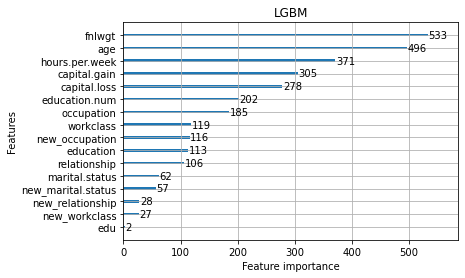

In [36]:
from lightgbm import plot_importance

model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plot_importance(model, max_num_features=20, title='LGBM')
plt.show()

Precision:	0.8345238095238096
Recall:		0.7162196679438059


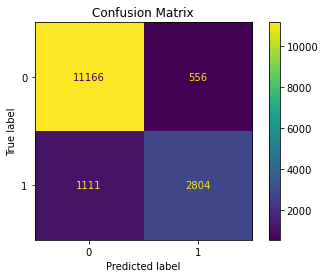

In [37]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score


label=[0, 1] # 라벨 설정
plot = plot_confusion_matrix(model, X_train, y_train,)
plot.ax_.set_title('Confusion Matrix')

y_pred = model.predict(X_train)
y_true = data['target'].to_numpy()
conf = confusion_matrix(y_true, y_pred)
precision=precision_score(y_true, y_pred)
recall=recall_score(y_true, y_pred)
print(f'Precision:\t{precision}')
print(f'Recall:\t\t{recall}')